# Specutils Analysis

![Specutils: An Astropy Package for Spectroscopy](data/specutils_logo.png)


This notebook provides an overview of some of the spectral analysis capabilities of the Specutils Astropy coordinated package.  While this notebook is intended as an interactive introduction to specutils at the time of its writing, the canonical source of information for the package is the latest version's documentation: 

https://specutils.readthedocs.io

Note that the below assumes you have knowledge of the material in the [overview notebook](Specutils_overview.ipynb).  If this is not the case you may wish to review that notebook before proceding here.

## Imports

We start with some fundamental imports for working with specutils and simple visualization of spectra:

In [1]:
import numpy as np

import astropy.units as u

import specutils
from specutils import Spectrum1D, SpectralRegion
specutils.__version__

'0.5.1'

In [2]:
# for plotting:
%matplotlib inline
import matplotlib.pyplot as plt


# for showing quantity units on axes automatically:
from astropy.visualization import quantity_support
quantity_support();

## Sample Spectrum and SNR

For use below, we also load the sample SDSS spectrum downloaded in the [overview notebook](Specutils_overview.ipynb).  See that notebook if you have not yet downloaded this spectrum.

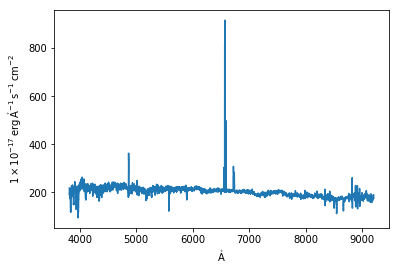

In [3]:
sdss_spec = Spectrum1D.read('data/sdss_spectrum.fits', format='SDSS-III/IV spec')
plt.step(sdss_spec.wavelength, sdss_spec.flux);

Because this example file already has uncertainties, it is straightforward to use one of the fundamental quantifications of a spectrum: the whole-spectrum signal-to-noise ratio:

In [4]:
from specutils.analysis import snr

snr(sdss_spec)

<Quantity 43.63593>

# Spectral Regions

Most analysis required on a spectrum requires specification of a part of the spectrum - e.g., a spectral line.  Because such regions may have value independent of a particular spectrum, they are represented as objects distinct from a given spectrum object.  Below we outline a few ways such regions are specified.

In [5]:
ha_region = SpectralRegion((6563-50)*u.AA, (6563+50)*u.AA)
ha_region

Spectral Region, 1 sub-regions:
  (6513.0 Angstrom, 6613.0 Angstrom) 

Regions can also be raw pixel values (although of course this is more applicable to a specific spectrum):

In [6]:
pixel_region = SpectralRegion(2100*u.pixel, 2600*u.pixel)
pixel_region

Spectral Region, 1 sub-regions:
  (2100.0 pix, 2600.0 pix) 

Additionally, *multiple* regions can be in the same `SpectralRegion` object. This is useful for e.g. measuring multiple spectral features in one call:

In [7]:
HI_wings_region = SpectralRegion([(1.4*u.GHz, 1.41*u.GHz), (1.43*u.GHz, 1.44*u.GHz)])
HI_wings_region

Spectral Region, 2 sub-regions:
  (1.4 GHz, 1.41 GHz)    (1.43 GHz, 1.44 GHz) 

While regions are useful for a variety of analysis steps, fundamentally they can be used to extract sub-spectra from larger spectra:

<Quantity 50.610855>

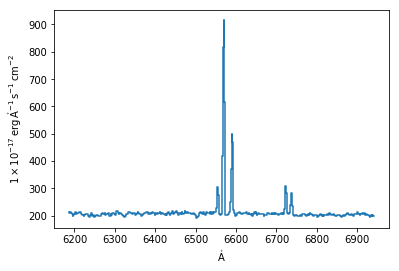

In [8]:
from specutils.manipulation import extract_region

subspec = extract_region(sdss_spec, pixel_region)
plt.step(subspec.wavelength, subspec.flux)

snr(subspec)

# Line Measurements

While line-fitting (detailed more below) as often the tool-of-choice for line measurements, more empirical measures are often also useful.

TODO

## Exercise

Load one of the spectrum datasets you made in the overview exercises into this notebook (i.e., your own dataset, a downloaded one, or the blackbody with an artificially added spectral feature).  Make a flux or width measurement of a line in that spectrum.  Anything odd?

# Continuum Subtraction

TODO

## Exercise

Using the spectrum from the previous exercise, first subtract a continuum, then re-do your measurement.  Is it better?

# Line-Fitting

TODO

## Exercise

Fit a spectral feature from your own spectrum using the fitting methods outlined above. Try the different line profile types (Gaussian, Lorentzian, or Voigt).  If you are using the blackbody spectrum (where you know the "true" answer for the spectral line), compare your answer to the true answer.